<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_104/blob/main/Semana3_Actividad1_Equipo104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Semana 4 - Actividad 2**

<img src="https://static.wikia.nocookie.net/tecdemonterrey/images/1/1b/Logo_Tec_azul.png/revision/latest?cb=20190219041656&path-prefix=es" width="230" />

Maestría en Inteligencia Artificial Aplicada

**Datos generales**
---
EQUIPO 104

**Integrantes:**
* Eddie Guadalupe Elorza Ruiz | **A01793547**
* Yves Turley Macias Vargas. | **A00813752**


>Materia: Ciencia y analítica de datos (Gpo 10)

>Profesor Titular: Jobish Vallikavungal

>Profesor Tutor: Victoria Guerrero Orozco

11 de octubre 2022

-----

## Descripción



## LIMPIEZA DE DATOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data = ('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv')
df = pd.read_csv(data)
df.columns = ['ID','Amount','Gender','Education','Marital','Age','His1','His2','His3','His4','His5','His6','Bill1','Bill2','Bill3','Bill4','Bill5','Bill6','Pay1','Pay2','Pay3','Pay4','Pay5','Pay6','Default']
df.head()

,ID,Amount,Gender,Education,Marital,Age,His1,His2,His3,His4,...,Bill4,Bill5,Bill6,Pay1,Pay2,Pay3,Pay4,Pay5,Pay6,Default
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [3]:
#Eliminamos valores vacios
df.dropna(axis = 0, inplace=True)
df.head()

,ID,Amount,Gender,Education,Marital,Age,His1,His2,His3,His4,...,Bill4,Bill5,Bill6,Pay1,Pay2,Pay3,Pay4,Pay5,Pay6,Default
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         29958 non-null  int64  
 1   Amount     29958 non-null  int64  
 2   Gender     29958 non-null  float64
 3   Education  29958 non-null  float64
 4   Marital    29958 non-null  float64
 5   Age        29958 non-null  float64
 6   His1       29958 non-null  float64
 7   His2       29958 non-null  float64
 8   His3       29958 non-null  float64
 9   His4       29958 non-null  float64
 10  His5       29958 non-null  float64
 11  His6       29958 non-null  float64
 12  Bill1      29958 non-null  float64
 13  Bill2      29958 non-null  float64
 14  Bill3      29958 non-null  float64
 15  Bill4      29958 non-null  float64
 16  Bill5      29958 non-null  float64
 17  Bill6      29958 non-null  float64
 18  Pay1       29958 non-null  float64
 19  Pay2       29958 non-null  float64
 20  Pay3  

## Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

In [5]:
#seleccionamos valores numericos
df_num = df.iloc[:,1:]
df_num.head()

,Amount,Gender,Education,Marital,Age,His1,His2,His3,His4,His5,...,Bill4,Bill5,Bill6,Pay1,Pay2,Pay3,Pay4,Pay5,Pay6,Default
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [6]:
df_num.corr()

,Amount,Gender,Education,Marital,Age,His1,His2,His3,His4,His5,...,Bill4,Bill5,Bill6,Pay1,Pay2,Pay3,Pay4,Pay5,Pay6,Default
Amount,1.000000,0.024212,-0.219120,-0.107801,0.144515,-0.271201,-0.296206,-0.286245,-0.267371,-0.249340,...,0.294090,0.295625,0.290517,0.195026,0.178320,0.210052,0.203187,0.216990,0.219567,-0.153781
Gender,0.024212,1.000000,0.014701,-0.031478,-0.091259,-0.057637,-0.070690,-0.065648,-0.059586,-0.054319,...,-0.021854,-0.017056,-0.016733,-0.000297,-0.001517,-0.008630,-0.002369,-0.001775,-0.002911,-0.039730
Education,-0.219120,0.014701,1.000000,-0.143431,0.175079,0.105636,0.121632,0.114012,0.108640,0.097220,...,-0.000566,-0.007625,-0.009192,-0.037385,-0.030007,-0.039953,-0.038263,-0.040276,-0.037189,0.028109
Marital,-0.107801,-0.031478,-0.143431,1.000000,-0.413926,0.019747,0.024052,0.032430,0.032826,0.035360,...,-0.023292,-0.025371,-0.021206,-0.005705,-0.008016,-0.003399,-0.012516,-0.001052,-0.006571,-0.024544
Age,0.144515,-0.091259,0.175079,-0.413926,1.000000,-0.039432,-0.050154,-0.053249,-0.049865,-0.054006,...,0.051528,0.049515,0.047810,0.025995,0.021820,0.029262,0.021338,0.022811,0.019533,0.013881
His1,-0.271201,-0.057637,0.105636,0.019747,-0.039432,1.000000,0.672290,0.574706,0.539384,0.509783,...,0.179138,0.180651,0.176992,-0.079230,-0.070083,-0.070460,-0.063934,-0.058104,-0.058616,0.324769
His2,-0.296206,-0.070690,0.121632,0.024052,-0.050154,0.672290,1.000000,0.766857,0.662429,0.622990,...,0.222216,0.221287,0.219339,-0.080771,-0.058981,-0.055864,-0.046856,-0.037049,-0.036491,0.263761
His3,-0.286245,-0.065648,0.114012,0.032430,-0.053249,0.574706,0.766857,1.000000,0.777245,0.686447,...,0.227518,0.225453,0.222608,0.001210,-0.066784,-0.053294,-0.046001,-0.035813,-0.035816,0.235765
His4,-0.267371,-0.059586,0.108640,0.032826,-0.049865,0.539384,0.662429,0.777245,1.000000,0.819655,...,0.246180,0.243161,0.239379,-0.009475,-0.001893,-0.069260,-0.043421,-0.033630,-0.026537,0.217037
His5,-0.249340,-0.054319,0.097220,0.035360,-0.054006,0.509783,0.622990,0.686447,0.819655,1.000000,...,0.272062,0.269916,0.262614,-0.006199,-0.003139,0.009061,-0.058267,-0.033325,-0.022982,0.204549


<AxesSubplot: >

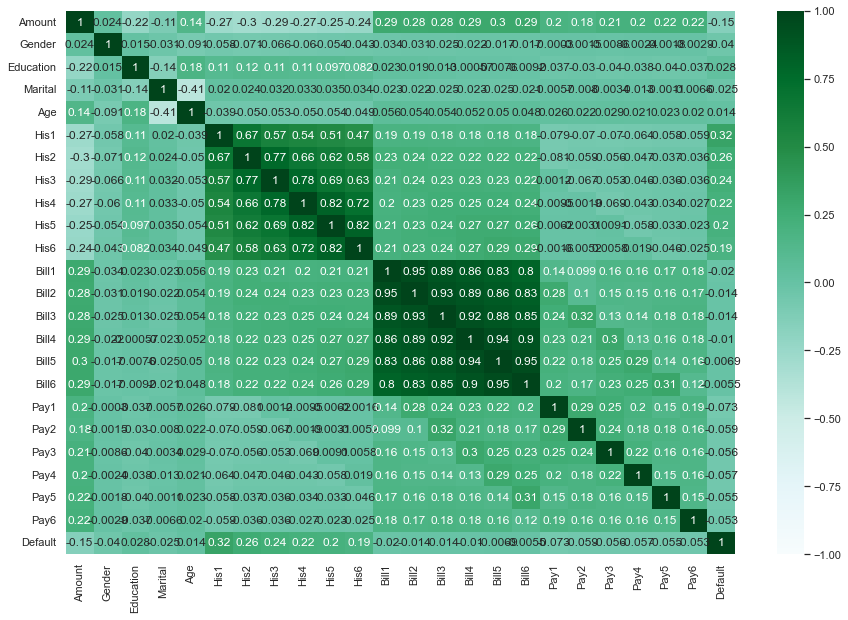

In [18]:
#Graficamos la matriz de correlacion
#definimos la variable de correlacion
corr = df_num.corr()
#definimos la figura
sns.set(rc = {'figure.figsize':(15,10)})
#graficamos la matriz de correlacion
sns.heatmap(corr, vmin = -1, vmax = 1, cmap = "BuGn", annot= True)


In [11]:
from sklearn.preprocessing import StandardScaler

scalr = StandardScaler()
scalr.fit(df_num)
df_num_scalr = scalr.transform(df_num)

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=24)
pca.fit(df_num_scalr)


PCA(n_components=24)

In [13]:

pca_t = pca.transform(df_num_scalr)

In [14]:
pcsSummary = pd.DataFrame({'Variance':pca.explained_variance_ratio_, 'Standard Deviation':np.sqrt(pca.explained_variance_ratio_), 'Cumulative Variance':np.cumsum(pca.explained_variance_ratio_)}, index = ['PC' + str(i) for i in range(1,25)])
pcsSummary


,Variance,Standard Deviation,Cumulative Variance
PC1,0.273010,0.522504,0.273010
PC2,0.175050,0.418390,0.448060
PC3,0.064706,0.254375,0.512766
PC4,0.061449,0.247889,0.574215
PC5,0.043370,0.208254,0.617585
PC6,0.040585,0.201458,0.658170
PC7,0.038155,0.195332,0.696325
PC8,0.037802,0.194428,0.734127
PC9,0.036931,0.192175,0.771058
PC10,0.036304,0.190537,0.807363


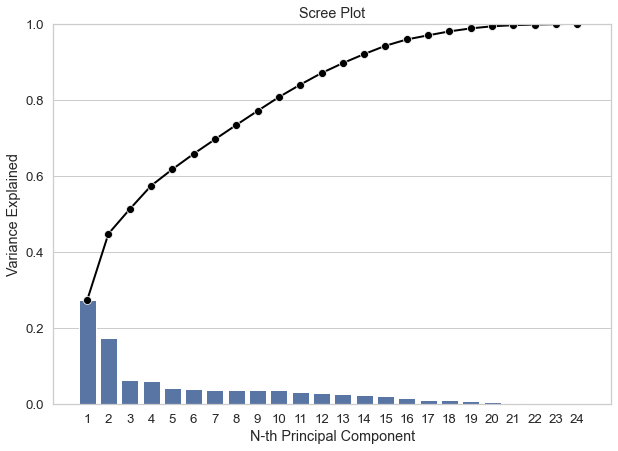

In [15]:
#Screen Plot
PC_components = np.arange(pca.n_components_) + 1

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )


fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pca.explained_variance_ratio_,
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pca.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()




## Paso 2: Interprete cada componente principal en términos de las variables originales
Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

In [16]:
#Examinamos la magnitud y la dirección de los coeficientes de las variables en cada componente principal
#definimos la variable de correlacion
print(pca.components_)

[[ 6.55980171e-02 -2.19851412e-02  1.98233129e-02 -5.57463750e-03
   1.40040837e-02  1.64629521e-01  1.97347974e-01  2.03364808e-01
   2.10039426e-01  2.13733802e-01  2.08879595e-01  3.32710782e-01
   3.44111102e-01  3.48044086e-01  3.52167734e-01  3.50071727e-01
   3.42868639e-01  9.26280332e-02  7.72882103e-02  8.49277328e-02
   7.64205042e-02  7.39917480e-02  6.86737027e-02  3.98214438e-02]
 [ 3.11653865e-01  3.04570365e-02 -8.84857339e-02 -3.94422613e-02
   6.27597172e-02 -2.96725579e-01 -3.27992163e-01 -3.34896602e-01
  -3.34391441e-01 -3.21173278e-01 -2.95759083e-01  1.43598137e-01
   1.44098606e-01  1.49966292e-01  1.49164849e-01  1.47337512e-01
   1.45287247e-01  1.48749834e-01  1.38704132e-01  1.49933953e-01
   1.39982718e-01  1.35753707e-01  1.28126313e-01 -1.76545485e-01]
 [ 1.00284702e-02  2.80714042e-02 -3.17658872e-01  4.67603449e-01
  -4.77732976e-01 -2.07109715e-02  1.86910033e-02  6.37931160e-02
   9.17835082e-02  1.11814476e-01  1.13954149e-01 -1.45919430e-01
  -1.226

In [ ]:
#valor absoluto de los coeficientes 
pd.DataFrame

## Paso 3: Identifique valores atípicos
Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.



# PARTE 2
**¿Cuál es el número de componentes mínimo y por qué?**

**¿Cuál es la variación de los datos que representan esos componentes?**

**¿Cuál es la pérdida de información después de realizar PCA?**

**De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

**¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**
